In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, DecisionTreeClassifier
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.linalg import Vectors
import matplotlib.pyplot as plt
import numpy as np
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col, when
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, ChiSqSelector
from pyspark.sql.functions import array, lit, explode
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pandas.read_csv('/content/drive/MyDrive/dataset bdpal/Extended_Employee_Performance_and_Productivity_Data.csv')
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [4]:
# cek nilai kosong
df.isnull().sum()

,0
Employee_ID,0
Department,0
Gender,0
Age,0
Job_Title,0
Hire_Date,0
Years_At_Company,0
Education_Level,0
Performance_Score,0
Monthly_Salary,0


In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [7]:
print('Employee ID:', df['Employee_ID'].unique())
print('Department:', df['Department'].unique())
print('Gender:', df['Gender'].unique())
print('Age:', df['Age'].unique())
print('Job Title:', df['Job_Title'].unique())
print('Hire Date:', df['Hire_Date'].unique())
print('Years At Company:', df['Years_At_Company'].unique())
print('Education Level:', df['Education_Level'].unique())
print('Performance Score:', df['Performance_Score'].unique())
print('Monthly Salary:', df['Monthly_Salary'].unique())
print('Work Hours Per Week:', df['Work_Hours_Per_Week'].unique())
print('Projects Handled:', df['Projects_Handled'].unique())
print('Overtime Hours:', df['Overtime_Hours'].unique())
print('Sick Days:', df['Sick_Days'].unique())
print('Remote Work Frequency:', df['Remote_Work_Frequency'].unique())
print('Team Size:', df['Team_Size'].unique())
print('Training Hours:', df['Training_Hours'].unique())
print('Promotions:', df['Promotions'].unique())
print('Employee Satisfaction Score:', df['Employee_Satisfaction_Score'].unique())
print('Resigned:', df['Resigned'].unique())

Employee ID: [     1      2      3 ...  99998  99999 100000]
Department: ['IT' 'Finance' 'Customer Support' 'Engineering' 'Marketing' 'HR'
 'Operations' 'Sales' 'Legal']
Gender: ['Male' 'Female' 'Other']
Age: [55 29 48 36 43 37 45 52 27 51 46 26 28 56 23 33 59 58 38 53 24 25 41 42
 44 60 32 31 40 57 35 34 54 49 39 47 50 30 22]
Job Title: ['Specialist' 'Developer' 'Analyst' 'Manager' 'Technician' 'Engineer'
 'Consultant']
Hire Date: ['2022-01-19 08:03:05.556036' '2024-04-18 08:03:05.556036'
 '2015-10-26 08:03:05.556036' ... '2015-12-25 08:03:05.556036'
 '2016-02-03 08:03:05.556036' '2017-07-15 08:03:05.556036']
Years At Company: [ 2  0  8  7  3  1  9  4  5  6 10]
Education Level: ['High School' 'Bachelor' 'Master' 'PhD']
Performance Score: [5 3 2 1 4]
Monthly Salary: [6750. 7500. 5850. 4800. 7800. 5250. 7200. 4200. 6050. 4900. 5600. 4400.
 6000. 6500. 5500. 6600. 9000. 6300. 5400. 5200. 8400. 4950. 7150. 7000.
 4550. 7700. 3850. 8250.]
Work Hours Per Week: [33 34 37 52 38 46 55 42 51 41

In [8]:
df = df.rename(columns={'Employee_ID':'id',
                        'Department':'department',
                        'Gender':'gender',
                        'Age':'age',
                        'Job_Title':'job',
                        'Hire_Date':'hire_date',
                        'Years_At_Company':'period',
                        'Education_Level':'degree',
                        'Performance_Score':'performance',
                        'Monthly_Salary':'salary',
                        'Work_Hours_Per_Week':'work_hour',
                        'Projects_Handled':'project',
                        'Overtime_Hours':'overtime_hour',
                        'Sick_Days':'sick',
                        'Remote_Work_Frequency':'remote_work',
                        'Team_Size':'team_size',
                        'Training_Hours':'training_hour',
                        'Promotions':'promotion',
                        'Employee_Satisfaction_Score':'satisfaction',
                        'Resigned':'resign'})
df.head()

,id,department,gender,age,job,hire_date,period,degree,performance,salary,work_hour,project,overtime_hour,sick,remote_work,team_size,training_hour,promotion,satisfaction,resign
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [9]:
map_department = {'IT': 0,
        'Finance':1,
        'Customer Support':2,
        'Engineering':3,
        'Marketing':4,
        'HR':5,
        'Operations':6,
        'Sales':7,
        'Legal':8}

map_gender = {'Male':0,
        'Female':1,
        'Other':2}

map_job = {'Specialist':0,
        'Developer':1,
        'Analyst':2,
        'Manager':3,
        'Technician':4,
        'Engineer':5,
        'Consultant':6}

map_degree = {'High School':0,
        'Bachelor':1,
        'Master':2,
        'PhD':3}

map_resign = {False:0,
        True:1}

df['department'] = df['department'].map(map_department)
df['gender'] = df['gender'].map(map_gender)
df['job'] = df['job'].map(map_job)
df['degree'] = df['degree'].map(map_degree)
df['resign'] = df['resign'].map(map_resign)

df['hire_date'] = pandas.to_datetime(df['hire_date'])

In [10]:
map_performance_class = {0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1}

df['performance_class'] = df['performance'].map(map_performance_class)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 100000 non-null  int64         
 1   department         100000 non-null  int64         
 2   gender             100000 non-null  int64         
 3   age                100000 non-null  int64         
 4   job                100000 non-null  int64         
 5   hire_date          100000 non-null  datetime64[ns]
 6   period             100000 non-null  int64         
 7   degree             100000 non-null  int64         
 8   performance        100000 non-null  int64         
 9   salary             100000 non-null  float64       
 10  work_hour          100000 non-null  int64         
 11  project            100000 non-null  int64         
 12  overtime_hour      100000 non-null  int64         
 13  sick               100000 non-null  int64    

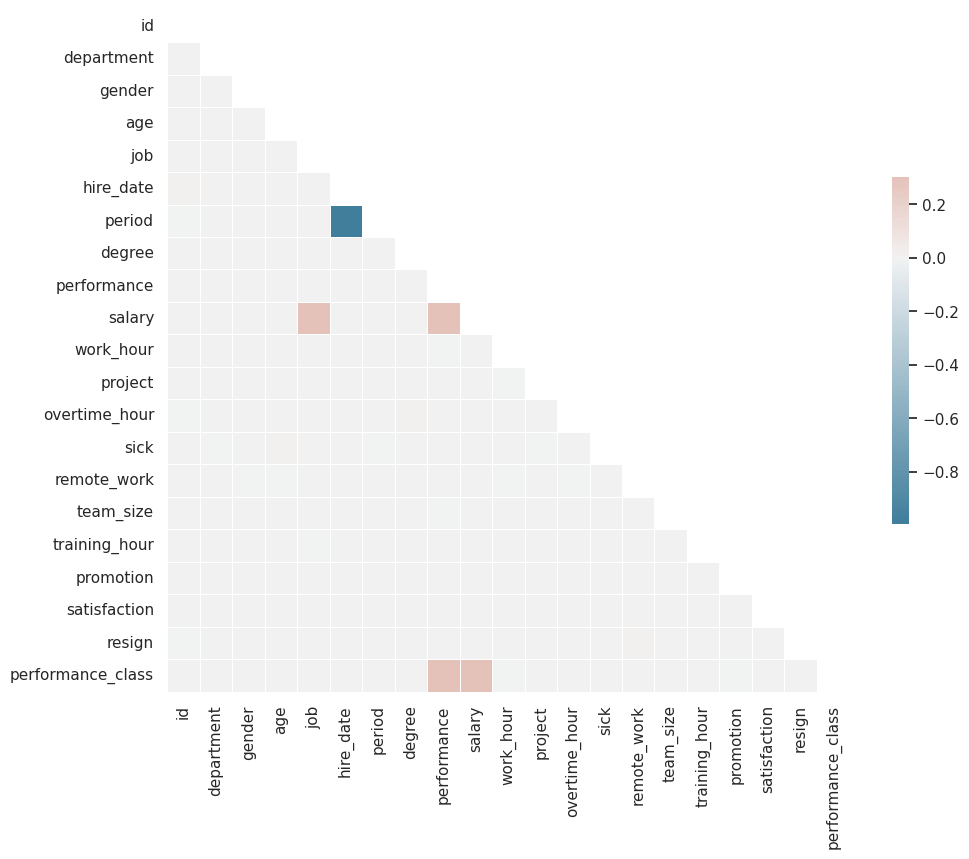

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

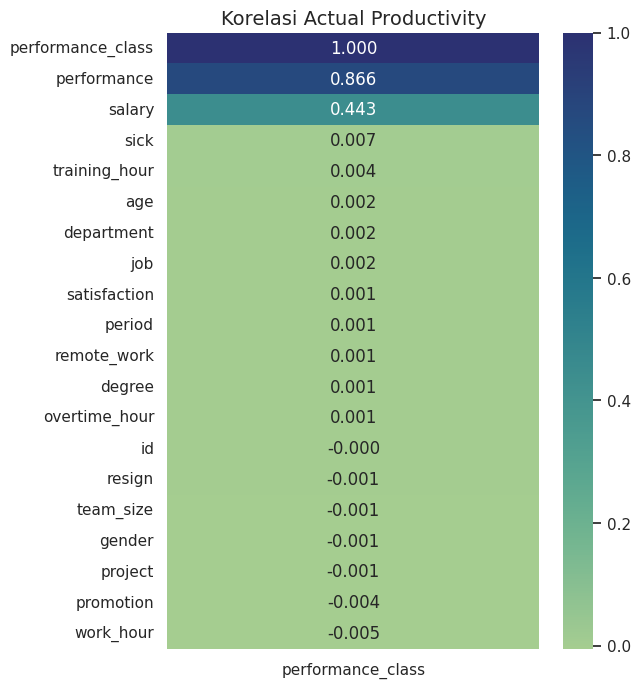

In [13]:
correlation_matrix = df.corr(method='pearson', numeric_only=True)

performance_correlation = correlation_matrix[['performance_class']].sort_values(by='performance_class', ascending=False)

plt.figure(figsize=(6, 8))
sns.heatmap(performance_correlation, annot=True, cmap='crest', fmt='.3f', cbar=True)

plt.title('Korelasi Actual Productivity', fontsize=14)
plt.show()

<ipython-input-14-773e042867fc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


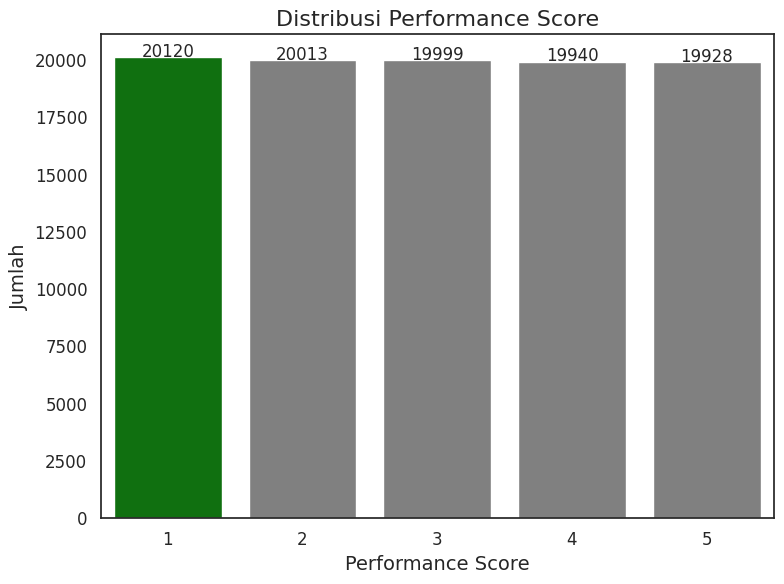

In [14]:
performance_counts = df['performance'].value_counts().sort_index(ascending=True)

# Warna: Hijau untuk batang terbesar, abu-abu untuk lainnya
colors = ['green' if i == 0 else 'gray' for i in range(len(performance_counts))]

# Plot distribusi
plt.figure(figsize=(8, 6))
barplot = sns.barplot(
    x=performance_counts.index,
    y=performance_counts.values,
    palette=colors
)

# Tambahkan angka di atas setiap batang
for idx, value in enumerate(performance_counts.values):
    plt.text(x=idx, y=value + 0.5, s=str(value), ha='center', fontsize=12)

# Tambahkan label dan judul
plt.title('Distribusi Performance Score', fontsize=16)
plt.xlabel('Performance Score', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Tampilkan plot
plt.tight_layout()
plt.show()

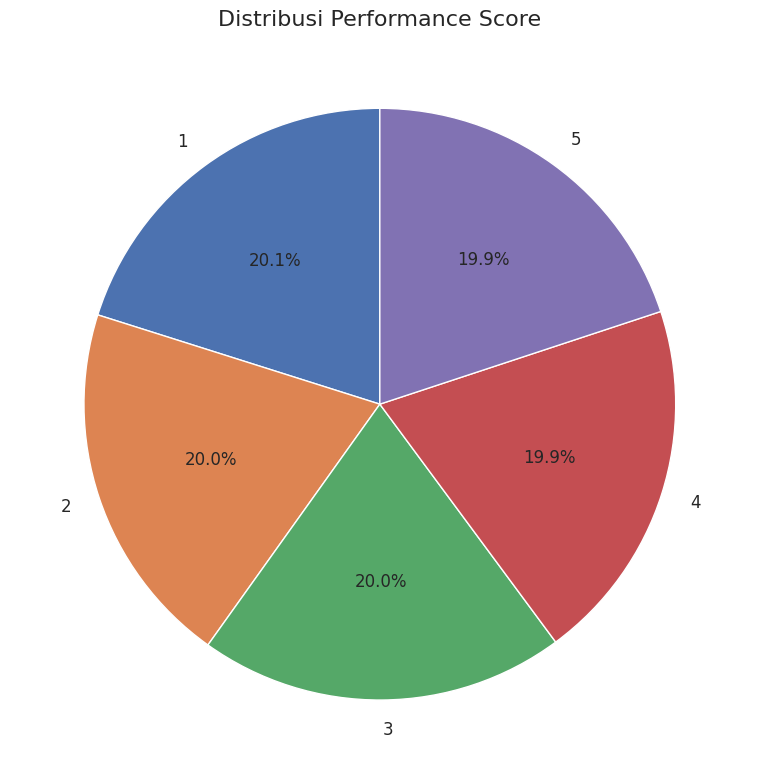

In [15]:
# Hitung distribusi
performance_counts = df['performance'].value_counts()

# Urutkan berdasarkan nilai descending
performance_counts = performance_counts.sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    performance_counts,
    labels=performance_counts.index,
    autopct='%1.1f%%',  # Tambahkan persentase
    startangle=90,      # Putar pie chart agar dimulai dari atas
    textprops={'fontsize': 12}  # Atur ukuran font
)

# Tambahkan judul
plt.title('Distribusi Performance Score', fontsize=16)

# Tampilkan plot
plt.tight_layout()
plt.show()

performance_class
1    59867
0    40133
Name: count, dtype: int64


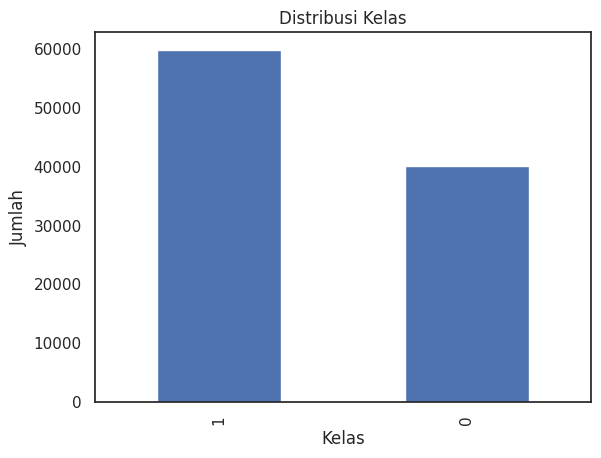

In [16]:
# Memeriksa distribusi kelas target
target_column = 'performance_class'
class_distribution = df[target_column].value_counts()
print(class_distribution)

# Visualisasi distribusi
class_distribution.plot(kind='bar')
plt.title('Distribusi Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()


<ipython-input-17-3401b5c770b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hire_month'] = df['hire_date'].dt.to_period('M')


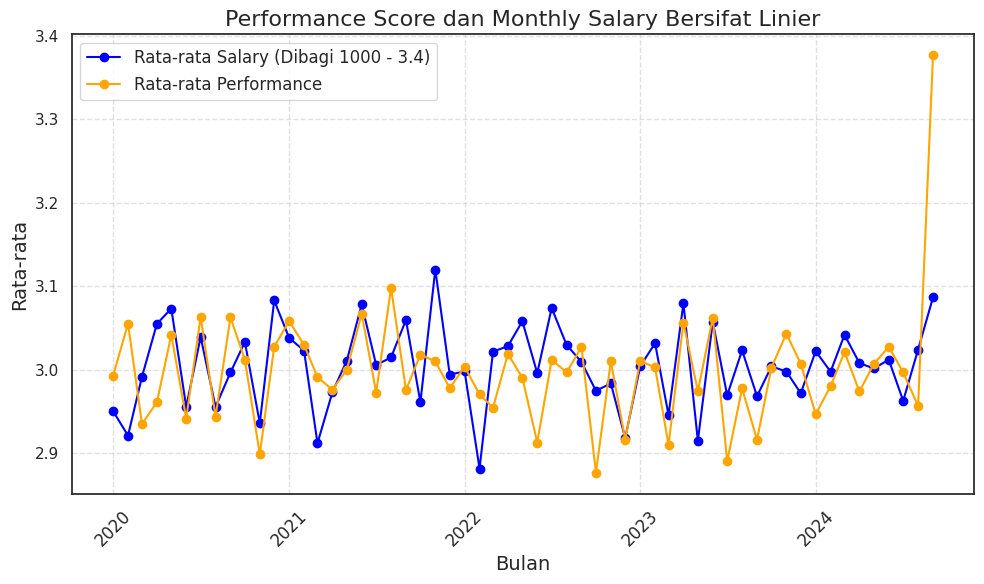

In [17]:
df = df[df['hire_date'] >= '2020-01-01']

# Ubah hire_date menjadi format bulanan
df['hire_month'] = df['hire_date'].dt.to_period('M')

# Hitung rata-rata salary dan performance per bulan
monthly_avg = df.groupby('hire_month')[['salary', 'performance']].mean().reset_index()

# Modifikasi salary: bagi 1000 lalu kurangi 3.4
monthly_avg['salary'] = (monthly_avg['salary'] / 1000) - 3.4

# Konversi hire_month kembali ke format datetime untuk plot
monthly_avg['hire_month'] = monthly_avg['hire_month'].dt.to_timestamp()

# Plot garis rata-rata salary dan performance
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg['hire_month'], monthly_avg['salary'], label='Rata-rata Salary (Dibagi 1000 - 3.4)', color='blue', marker='o')
plt.plot(monthly_avg['hire_month'], monthly_avg['performance'], label='Rata-rata Performance', color='orange', marker='o')

# Tambahkan judul, label, dan legenda
plt.title('Performance Score dan Monthly Salary Bersifat Linier', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Rata-rata', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Atur format tanggal agar lebih rapi
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Tampilkan plot
plt.show()

In [18]:
# Buang kolom id, hire_date, dan hire_month
df = df.drop('id', axis=1).drop('hire_date', axis=1).drop('hire_month', axis=1).drop('performance', axis=1)

In [19]:
import pandas as pd  # Import pandas dengan alias 'pd'

from imblearn.under_sampling import RandomUnderSampler  # Import RandomUnderSampler

# Menyeimbangkan dataset menggunakan Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X = df.drop(columns=[target_column])  # Fitur
y = df[target_column]  # Target
X_resampled, y_resampled = rus.fit_resample(X, y)

# Membuat DataFrame baru
df_balanced = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=[target_column])], axis=1)

# Memeriksa ulang distribusi
print(df_balanced[target_column].value_counts())


performance_class
0    18984
1    18984
Name: count, dtype: int64


In [20]:
# Inisialisasi Spark session
spark = SparkSession.builder.appName("Model Classifier").getOrCreate()

# Misalnya df adalah DataFrame yang sudah ada
df_spark = spark.createDataFrame(df)

# Menyiapkan fitur
feature_columns = [col for col in df.columns if col != 'performance_class']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_transformed = assembler.transform(df_spark)

# Pembagian data menjadi train dan test
train_data, test_data = df_transformed.randomSplit([0.8, 0.2], seed=42)

# Model RandomForestClassifier
rf = RandomForestClassifier(labelCol="performance_class", featuresCol="features", numTrees=100)

# Evaluator untuk klasifikasi multi-kelas
evaluator = MulticlassClassificationEvaluator(labelCol="performance_class", predictionCol="prediction", metricName="accuracy")

# Evaluator untuk AUC (ROC Curve)
binary_evaluator = BinaryClassificationEvaluator(labelCol="performance_class", rawPredictionCol="prediction", metricName="areaUnderROC")

# Melatih model RandomForest
rf_model = rf.fit(train_data)

# Memprediksi pada data uji
rf_predictions = rf_model.transform(test_data)

# Evaluasi model
accuracy = evaluator.evaluate(rf_predictions)
auc = binary_evaluator.evaluate(rf_predictions)

# F1 Score, Precision, Recall
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="performance_class", predictionCol="prediction", metricName="f1")
evaluator_precision = MulticlassClassificationEvaluator(labelCol="performance_class", predictionCol="prediction", metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(labelCol="performance_class", predictionCol="prediction", metricName="weightedRecall")

f1 = evaluator_f1.evaluate(rf_predictions)
precision = evaluator_precision.evaluate(rf_predictions)
recall = evaluator_recall.evaluate(rf_predictions)

# Menampilkan hasil evaluasi
print("Random Forest Results:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  AUC: {auc:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print("-" * 40)

# Menutup Spark session
spark.stop()

Random Forest Results:
  Accuracy: 0.7908
  AUC: 0.7529
  F1 Score: 0.7783
  Precision: 0.8113
  Recall: 0.7908
----------------------------------------


In [21]:
try:
    spark
    print(f"Nama aplikasi Spark yang sedang berjalan: {spark.sparkContext.appName}")
except NameError:
    print("Tidak ada SparkSession yang aktif.")

Nama aplikasi Spark yang sedang berjalan: Model Classifier


In [22]:
# Inisialisasi Spark session
spark = SparkSession.builder.appName("Decision Tree Classifier").getOrCreate()

# Contoh dataset, pastikan df_spark adalah DataFrame Anda yang sudah ada
# Misalnya df_spark adalah DataFrame dari df Pandas Anda
df_spark = spark.createDataFrame(df)

# Menyiapkan fitur
feature_columns = [col for col in df.columns if col != 'performance_class']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_transformed = assembler.transform(df_spark)

# Pembagian data menjadi train dan test
train_data, test_data = df_transformed.randomSplit([0.8, 0.2], seed=42)

# Model DecisionTreeClassifier
dt = DecisionTreeClassifier(labelCol="performance_class", featuresCol="features")

# Evaluator untuk klasifikasi multi-kelas
evaluator = MulticlassClassificationEvaluator(labelCol="performance_class", predictionCol="prediction", metricName="accuracy")

# Evaluator untuk AUC (ROC Curve)
binary_evaluator = BinaryClassificationEvaluator(labelCol="performance_class", rawPredictionCol="prediction", metricName="areaUnderROC")

# Melatih model DecisionTree
dt_model = dt.fit(train_data)

# Memprediksi pada data uji
dt_predictions = dt_model.transform(test_data)

# Evaluasi model
accuracy = evaluator.evaluate(dt_predictions)
auc = binary_evaluator.evaluate(dt_predictions)

# F1 Score, Precision, Recall
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="performance_class", predictionCol="prediction", metricName="f1")
evaluator_precision = MulticlassClassificationEvaluator(labelCol="performance_class", predictionCol="prediction", metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(labelCol="performance_class", predictionCol="prediction", metricName="weightedRecall")

f1 = evaluator_f1.evaluate(dt_predictions)
precision = evaluator_precision.evaluate(dt_predictions)
recall = evaluator_recall.evaluate(dt_predictions)

# Menampilkan hasil evaluasi
print("Decision Tree Results:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  AUC: {auc:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print("-" * 40)

Decision Tree Results:
  Accuracy: 0.8823
  AUC: 0.8665
  F1 Score: 0.8805
  Precision: 0.8852
  Recall: 0.8823
----------------------------------------


In [23]:
# Cek nama kolom yang ada dalam DataFrame
print(df.columns) # Change data to df

Index(['department', 'gender', 'age', 'job', 'period', 'degree', 'salary',
       'work_hour', 'project', 'overtime_hour', 'sick', 'remote_work',
       'team_size', 'training_hour', 'promotion', 'satisfaction', 'resign',
       'performance_class'],
      dtype='object')


In [24]:
# Restart SparkSession jika sebelumnya telah dihentikan
spark = SparkSession.builder.appName("FeatureSelection").getOrCreate()

# Pastikan df_spark telah didefinisikan sebelumnya
data = df_spark


In [25]:
# Get or create an active SparkSession
spark = SparkSession.builder.appName("FeatureSelection").getOrCreate()

# Load dataset (recreate data DataFrame from Pandas df)
data = spark.createDataFrame(df)

# Select and rename columns
selected_columns = ['department', 'gender', 'age', 'job', 'period', 'degree', 'salary',
       'work_hour', 'project', 'overtime_hour', 'sick', 'remote_work',
       'team_size', 'training_hour', 'promotion', 'satisfaction', 'resign',
       'performance_class']
data = data.select(selected_columns).withColumnRenamed("performance_class", "label")

# Transform features into a vector
feature_columns = [col for col in selected_columns if col != 'performance_class']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features_raw")
data = assembler.transform(data)

# Feature Selection using Chi-Square Test
selector = ChiSqSelector(numTopFeatures=2, featuresCol="features_raw", outputCol="selected_features", labelCol="label")
model = selector.fit(data) # Fit the selector to get the model
selected_data = model.transform(data)

# Get selected feature indices and map to column names
selected_feature_indices = model.selectedFeatures
selected_feature_names = [feature_columns[i] for i in selected_feature_indices]

# Display selected features with names
print("Selected Features:")
print(selected_feature_names)

# Display data sample with selected features and column names
selected_data.select("selected_features", "label").show(10, truncate=False)

# Instead of exploding the 'selected_features' column directly,
# create a new array column containing the selected feature values
# based on the selected feature indices.
from pyspark.sql.functions import array
selected_data = selected_data.withColumn(
    "selected_feature_values",
    array(*[col(name) for name in selected_feature_names])
)

# Now you can explode the 'selected_feature_values' column.
selected_features_df = selected_data.select(
    explode(array(*[lit(name) for name in selected_feature_names])).alias("feature_name"),
    explode("selected_feature_values").alias("feature_value"),
    "label"  # Include the label column if needed
)

# Show the DataFrame
selected_features_df.show(10, truncate=False)

# Avoid stopping the Spark session to allow further operations
spark.stop()

Selected Features:
['salary', 'work_hour']
+-----------------------+-----+
|selected_features      |label|
+-----------------------+-----+
|(2,[0,1],[6750.0,33.0])|1    |
|[7500.0,34.0]          |1    |
|[4800.0,38.0]          |0    |
|[5250.0,55.0]          |1    |
|[4200.0,51.0]          |0    |
|[4400.0,33.0]          |0    |
|[6000.0,33.0]          |0    |
|[6500.0,47.0]          |1    |
|[6600.0,33.0]          |0    |
|[6750.0,59.0]          |1    |
+-----------------------+-----+
only showing top 10 rows

+------------+-------------+-----+
|feature_name|feature_value|label|
+------------+-------------+-----+
|salary      |6750.0       |1    |
|salary      |33.0         |1    |
|work_hour   |6750.0       |1    |
|work_hour   |33.0         |1    |
|salary      |7500.0       |1    |
|salary      |34.0         |1    |
|work_hour   |7500.0       |1    |
|work_hour   |34.0         |1    |
|salary      |4800.0       |0    |
|salary      |38.0         |0    |
+------------+-------------+

In [26]:

# Inisialisasi Spark Session di luar cell agar tetap aktif selama proses
# Pastikan Anda tidak memanggil spark.stop() di cell sebelumnya
# Restart SparkSession jika sebelumnya telah dihentikan
spark = SparkSession.builder.appName("HyperparameterTuning_RF").getOrCreate()


# Karena df_spark sudah ada, gunakan langsung untuk transformasi data
# Pastikan df_spark masih valid dan terhubung dengan SparkSession yang aktif
# Load dataset (recreate data DataFrame from Pandas df)
data = spark.createDataFrame(df).select("salary", "work_hour", "performance_class") # Recreate df_spark

# Transformasi fitur menjadi vektor
assembler = VectorAssembler(inputCols=["salary", "work_hour"], outputCol="features")
data = assembler.transform(data)

# Split dataset menjadi data latih dan data uji
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Definisi model Random Forest
rf = RandomForestClassifier(labelCol="performance_class", featuresCol="features")

# Parameter grid untuk Random Forest
rf_param_grid = (
    ParamGridBuilder()
    .addGrid(rf.numTrees, [10, 20, 50])
    .addGrid(rf.maxDepth, [5, 10, 15])
    .build()
)

# Evaluator untuk mengukur akurasi
evaluator = MulticlassClassificationEvaluator(
    labelCol="performance_class", metricName="accuracy"
)

# CrossValidator untuk Random Forest
rf_cv = CrossValidator(
    estimator=rf,
    estimatorParamMaps=rf_param_grid,
    evaluator=evaluator,
    numFolds=3,
)

# Training Random Forest
rf_model = rf_cv.fit(train_data)
rf_best_model = rf_model.bestModel

# Evaluasi model pada data uji
rf_accuracy = evaluator.evaluate(rf_best_model.transform(test_data))

# Menampilkan hasil
print(f"Random Forest Best Accuracy: {rf_accuracy}")
print(f"Best Random Forest Params: {rf_best_model.extractParamMap()}")

# Pindahkan spark.stop() ke cell terakhir notebook atau saat Anda benar-benar selesai dengan Spark
# spark.stop()

Random Forest Best Accuracy: 0.9694697375468666
Best Random Forest Params: {Param(parent='RandomForestClassifier_1b06eee44837', name='bootstrap', doc='Whether bootstrap samples are used when building trees.'): True, Param(parent='RandomForestClassifier_1b06eee44837', name='cacheNodeIds', doc='If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval.'): False, Param(parent='RandomForestClassifier_1b06eee44837', name='checkpointInterval', doc='set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext.'): 10, Param(parent='RandomForestClassifier_1b06eee44837', name='featureSubsetStrategy', do

In [27]:
# Inisialisasi Spark Session di luar cell agar tetap aktif selama proses
# Pastikan Anda tidak memanggil spark.stop() di cell sebelumnya
# Restart SparkSession jika sebelumnya telah dihentikan
# spark = SparkSession.builder.appName("HyperparameterTuning_DT").getOrCreate() # This line was causing the issue. It was creating a new session and then immediately stopping it.
# We need to ensure the SparkSession remains active throughout your notebook execution. If you have previously stopped the session, start a new one or restart the kernel.

# Check if spark is already running
try:
    spark
    print("SparkSession is already running.")
except NameError:
    # If spark is not defined, create a new SparkSession
    spark = SparkSession.builder.appName("HyperparameterTuning_DT").getOrCreate()
    print("Created a new SparkSession.")


# Karena df_spark sudah ada, gunakan langsung untuk transformasi data
# Create a new Spark DataFrame from the Pandas DataFrame 'df'
# because df_spark might be associated with a stopped SparkSession.
data = spark.createDataFrame(df).select("salary", "work_hour", "performance_class")

# Transformasi fitur menjadi vektor
assembler = VectorAssembler(inputCols=["salary", "work_hour"], outputCol="features")
data = assembler.transform(data)

# Split dataset menjadi data latih dan data uji
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Definisi model Decision Tree
dt = DecisionTreeClassifier(labelCol="performance_class", featuresCol="features")

# Parameter grid untuk Decision Tree
dt_param_grid = (
    ParamGridBuilder()
    .addGrid(dt.maxDepth, [5, 10, 15])
    .addGrid(dt.maxBins, [32, 64])
    .build()
)

# Evaluator untuk mengukur akurasi
evaluator = MulticlassClassificationEvaluator(
    labelCol="performance_class", metricName="accuracy"
)

# CrossValidator untuk Decision Tree
dt_cv = CrossValidator(
    estimator=dt,
    estimatorParamMaps=dt_param_grid,
    evaluator=evaluator,
    numFolds=3,
)

# Training Decision Tree
dt_model = dt_cv.fit(train_data)
dt_best_model = dt_model.bestModel

# Evaluasi model pada data uji
dt_accuracy = evaluator.evaluate(dt_best_model.transform(test_data))

# Menampilkan hasil
print(f"Decision Tree Best Accuracy: {dt_accuracy}")
print(f"Best Decision Tree Params: {dt_best_model.extractParamMap()}")

# spark.stop()

SparkSession is already running.
Decision Tree Best Accuracy: 0.9691483663631494
Best Decision Tree Params: {Param(parent='DecisionTreeClassifier_83e7c6bd430c', name='cacheNodeIds', doc='If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval.'): False, Param(parent='DecisionTreeClassifier_83e7c6bd430c', name='checkpointInterval', doc='set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext.'): 10, Param(parent='DecisionTreeClassifier_83e7c6bd430c', name='featuresCol', doc='features column name.'): 'features', Param(parent='DecisionTreeClassifier_83e7c6bd430c', name='impurity', doc='Cri

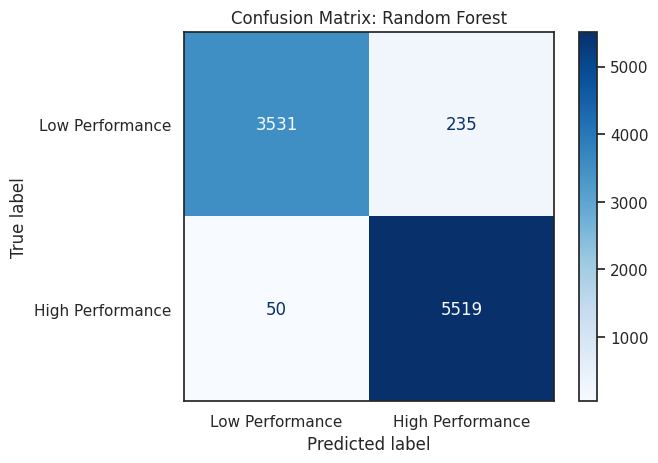

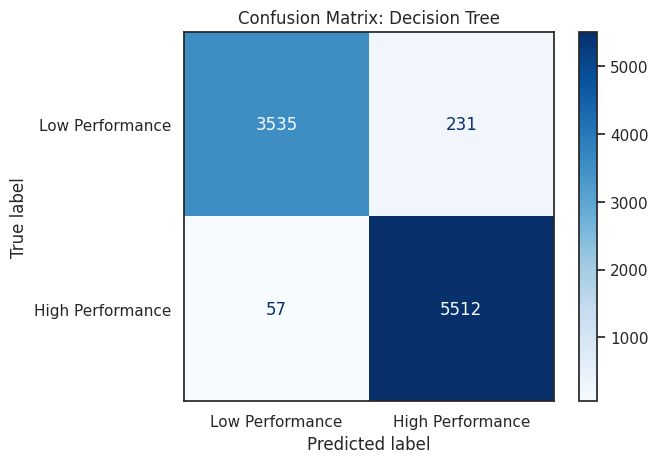

In [28]:


# ... (kode sebelumnya untuk inisialisasi Spark, transformasi data,
#      dan hyperparameter tuning untuk Random Forest dan Decision Tree) ...

# Menghasilkan prediksi untuk data uji menggunakan model terbaik
rf_predictions = rf_best_model.transform(test_data)
dt_predictions = dt_best_model.transform(test_data)

# Konversi prediksi ke Pandas DataFrame untuk mempermudah analisis
rf_pred_df = rf_predictions.select("performance_class", "prediction").toPandas()
dt_pred_df = dt_predictions.select("performance_class", "prediction").toPandas()

# Menghitung dan menampilkan confusion matrix untuk Random Forest
rf_cm = confusion_matrix(rf_pred_df["performance_class"], rf_pred_df["prediction"])
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm,
                                 display_labels=['Low Performance', 'High Performance']) # Menambahkan label
rf_disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Random Forest")
plt.show()

# Menghitung dan menampilkan confusion matrix untuk Decision Tree
dt_cm = confusion_matrix(dt_pred_df["performance_class"], dt_pred_df["prediction"])
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm,
                                 display_labels=['Low Performance', 'High Performance']) # Menambahkan label
dt_disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Decision Tree")
plt.show()